In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output

from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [81]:
data=pd.read_csv('wdbc.data',header=None)

data.head()

In [82]:
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

In [83]:
data.to_csv('labeledData.csv',header=headers,index=False)

In [84]:
data=pd.read_csv('labeledData.csv')
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
data.shape

(569, 32)

In [86]:
data.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

In [87]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [89]:
data.dtypes

id                           int64
diagnosis                   object
mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave points        float64
mean_symmetry              float64
mean_fractal dimension     float64
SE_radius                  float64
SE_texture                 float64
SE_perimeter               float64
SE_area                    float64
SE_smoothness              float64
SE_compactness             float64
SE_concavity               float64
SE_concave points          float64
SE_symmetry                float64
SE_fractal dimension       float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity     

In [91]:
list=['id','diagnosis']
y=data.diagnosis
x=data.drop(list,axis=1)
x.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [93]:
data=x
data_std=(data-data.mean())/(data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'mean_radius'),
  Text(1, 0, 'mean_texture'),
  Text(2, 0, 'mean_perimeter'),
  Text(3, 0, 'mean_area'),
  Text(4, 0, 'mean_smoothness'),
  Text(5, 0, 'mean_compactness'),
  Text(6, 0, 'mean_concavity'),
  Text(7, 0, 'mean_concave points'),
  Text(8, 0, 'mean_symmetry'),
  Text(9, 0, 'mean_fractal dimension')])

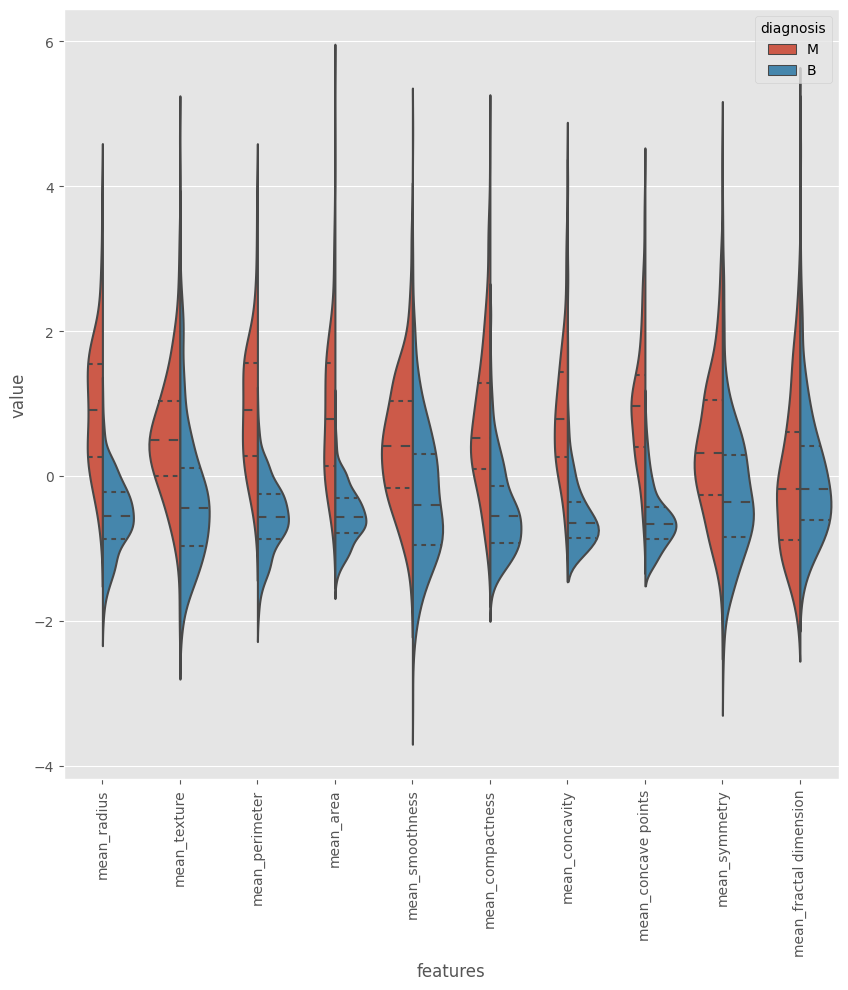

In [94]:
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'mean_radius'),
  Text(1, 0, 'mean_texture'),
  Text(2, 0, 'mean_perimeter'),
  Text(3, 0, 'mean_area'),
  Text(4, 0, 'mean_smoothness'),
  Text(5, 0, 'mean_compactness'),
  Text(6, 0, 'mean_concavity'),
  Text(7, 0, 'mean_concave points'),
  Text(8, 0, 'mean_symmetry'),
  Text(9, 0, 'mean_fractal dimension')])

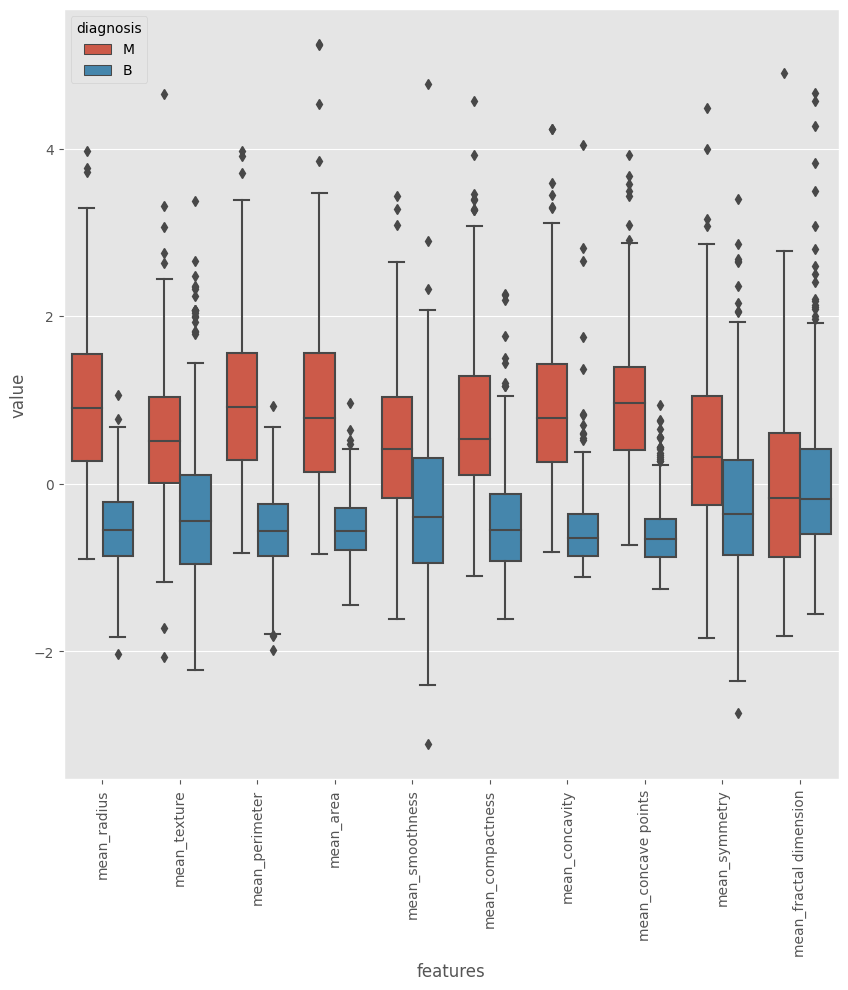

In [95]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features",y="value",hue='diagnosis',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SE_radius'),
  Text(1, 0, 'SE_texture'),
  Text(2, 0, 'SE_perimeter'),
  Text(3, 0, 'SE_area'),
  Text(4, 0, 'SE_smoothness'),
  Text(5, 0, 'SE_compactness'),
  Text(6, 0, 'SE_concavity'),
  Text(7, 0, 'SE_concave points'),
  Text(8, 0, 'SE_symmetry'),
  Text(9, 0, 'SE_fractal dimension')])

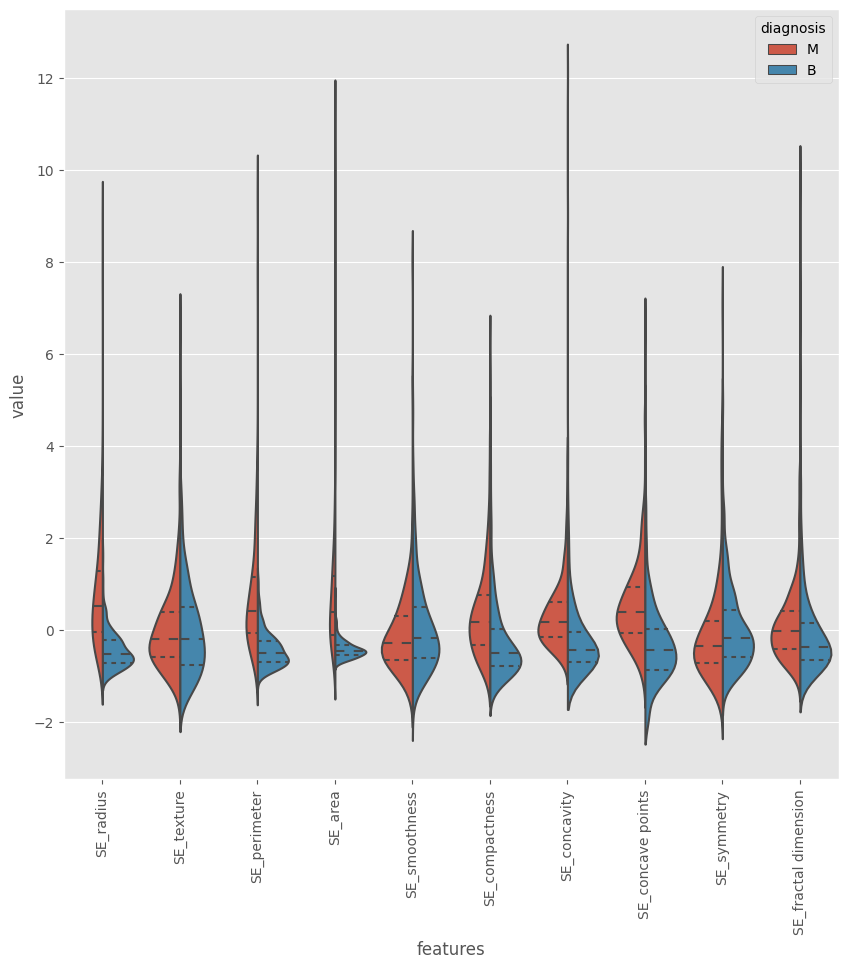

In [96]:
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SE_radius'),
  Text(1, 0, 'SE_texture'),
  Text(2, 0, 'SE_perimeter'),
  Text(3, 0, 'SE_area'),
  Text(4, 0, 'SE_smoothness'),
  Text(5, 0, 'SE_compactness'),
  Text(6, 0, 'SE_concavity'),
  Text(7, 0, 'SE_concave points'),
  Text(8, 0, 'SE_symmetry'),
  Text(9, 0, 'SE_fractal dimension')])

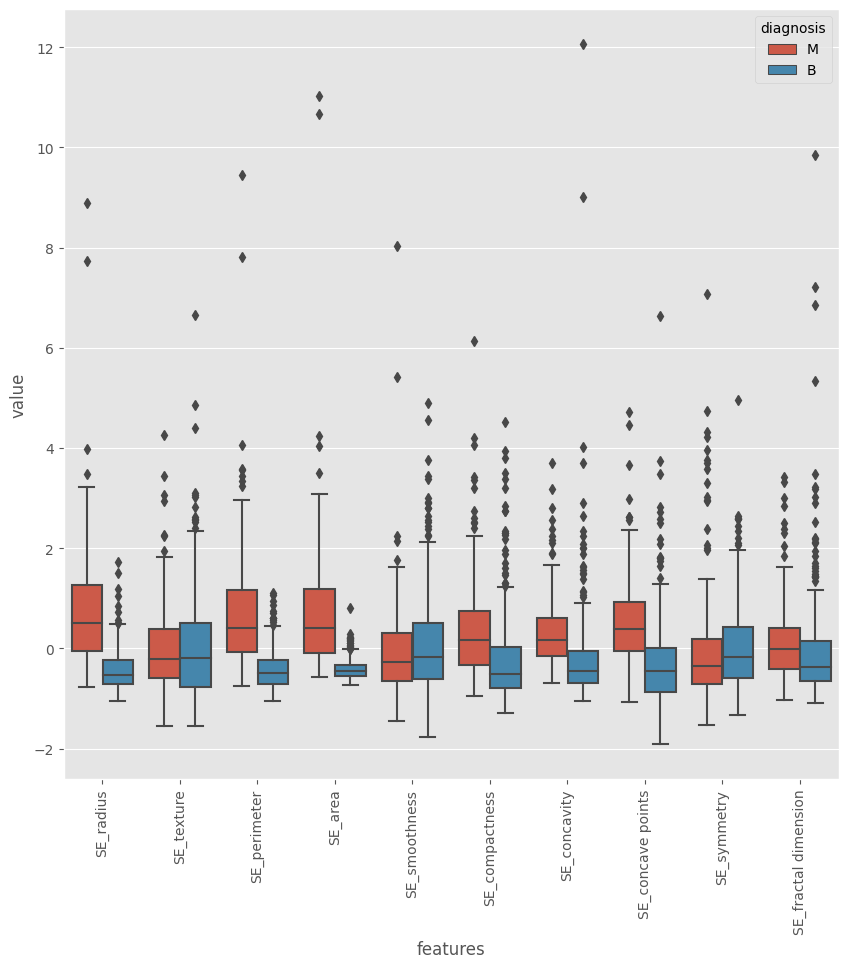

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features",y="value",hue='diagnosis',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'worst_radius'),
  Text(1, 0, 'worst_texture'),
  Text(2, 0, 'worst_perimeter'),
  Text(3, 0, 'worst_area'),
  Text(4, 0, 'worst_smoothness'),
  Text(5, 0, 'worst_compactness'),
  Text(6, 0, 'worst_concavity'),
  Text(7, 0, 'worst_concave points'),
  Text(8, 0, 'worst_symmetry'),
  Text(9, 0, 'worst_fractal dimension')])

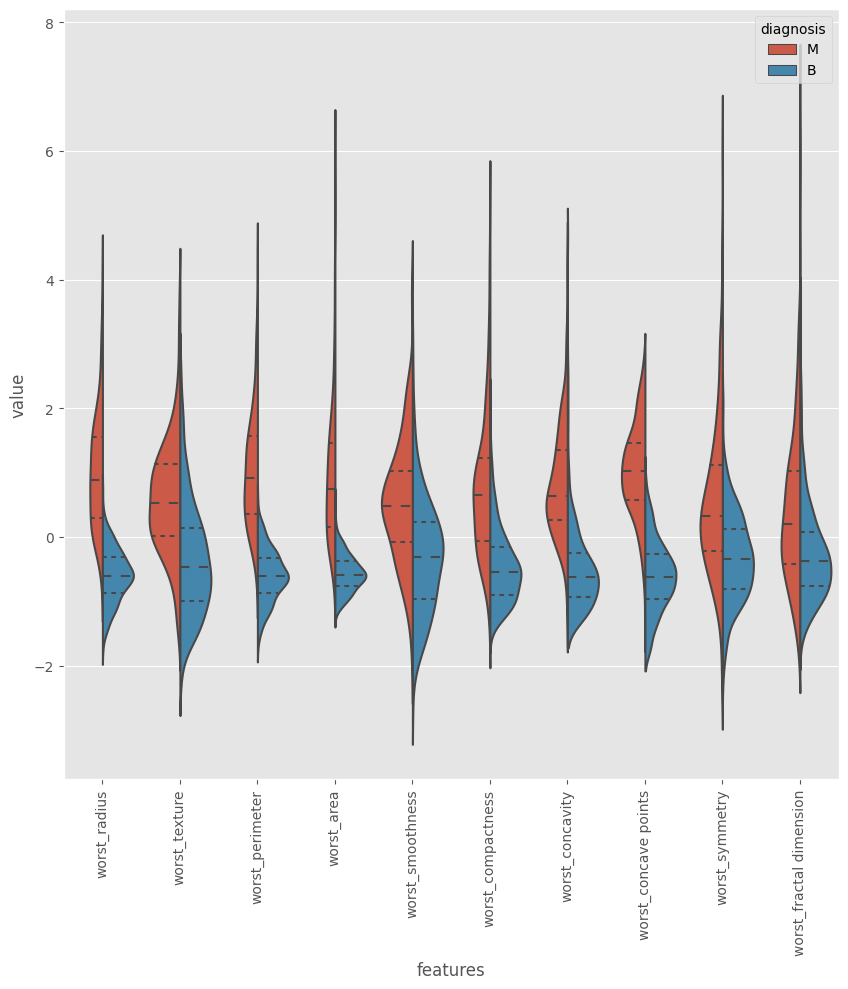

In [98]:
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'worst_radius'),
  Text(1, 0, 'worst_texture'),
  Text(2, 0, 'worst_perimeter'),
  Text(3, 0, 'worst_area'),
  Text(4, 0, 'worst_smoothness'),
  Text(5, 0, 'worst_compactness'),
  Text(6, 0, 'worst_concavity'),
  Text(7, 0, 'worst_concave points'),
  Text(8, 0, 'worst_symmetry'),
  Text(9, 0, 'worst_fractal dimension')])

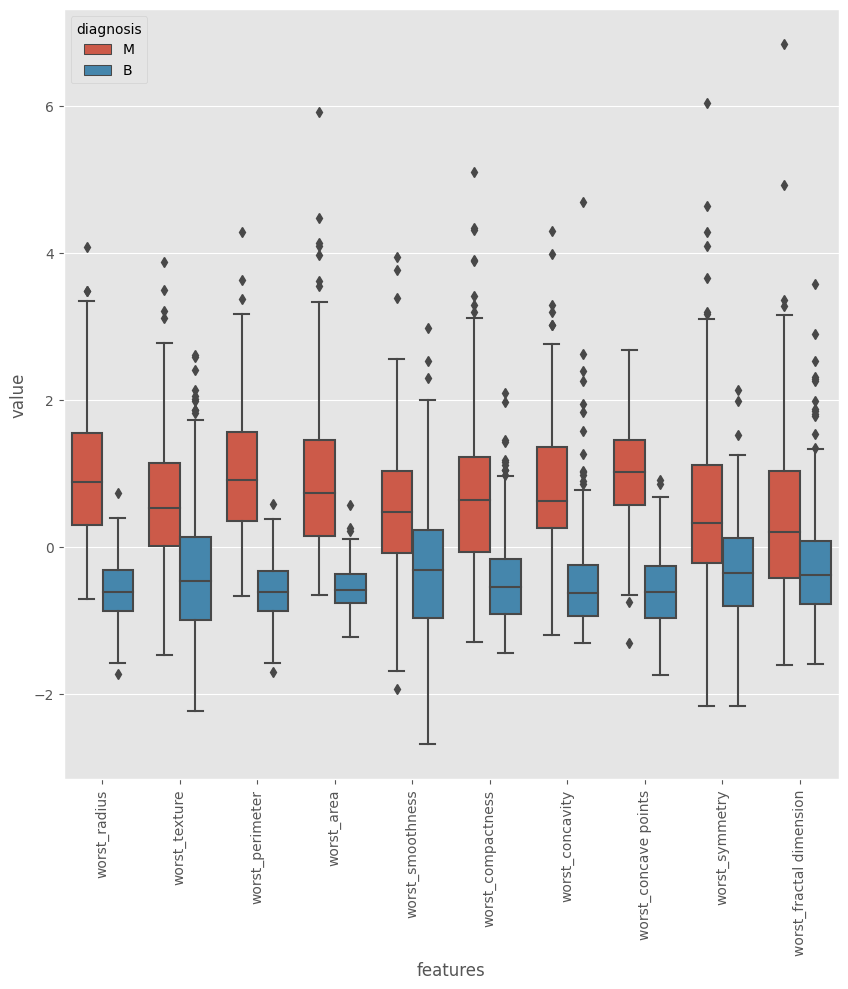

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features",y="value",hue='diagnosis',data=data)
plt.xticks(rotation=90)

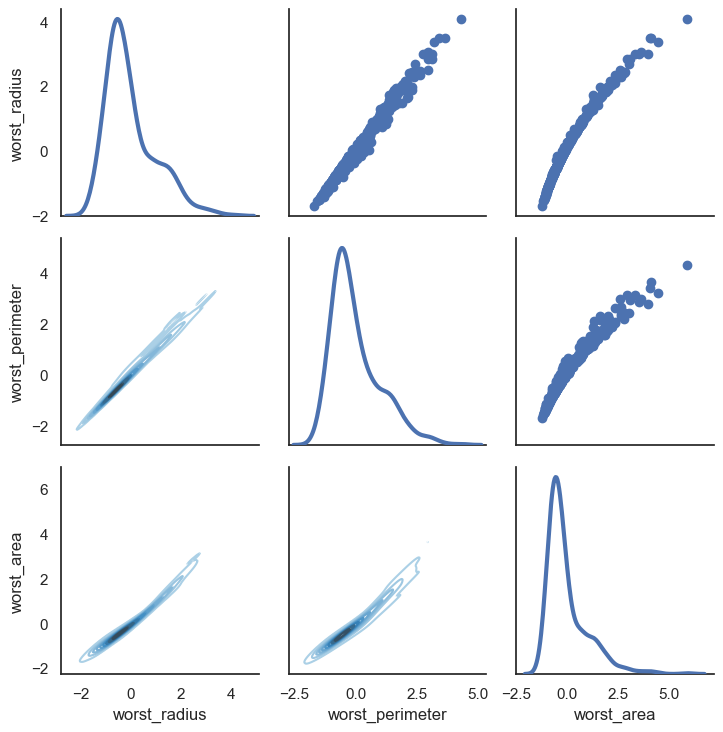

In [112]:
x=data_std
sns.set(style='white')
df=x.loc[:,['worst_radius','worst_perimeter','worst_area']]
g=sns.PairGrid(df,diag_sharey=False)
g.map_lower(sns.kdeplot,cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'mean_radius'),
  Text(1, 0, 'mean_texture'),
  Text(2, 0, 'mean_perimeter'),
  Text(3, 0, 'mean_area'),
  Text(4, 0, 'mean_smoothness'),
  Text(5, 0, 'mean_compactness'),
  Text(6, 0, 'mean_concavity'),
  Text(7, 0, 'mean_concave points'),
  Text(8, 0, 'mean_symmetry'),
  Text(9, 0, 'mean_fractal dimension')])

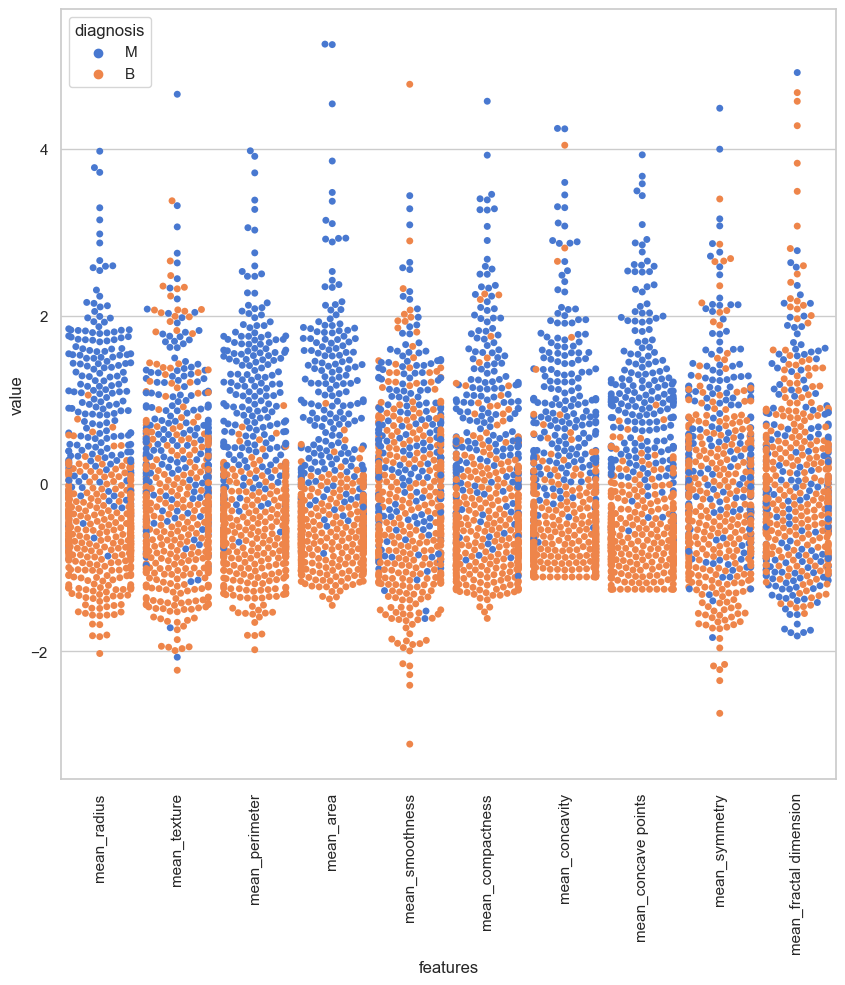

In [113]:
sns.set(style='whitegrid',palette='muted')
diag=y
data=x
data_n=(data-data.mean())/(data.std())
data=pd.concat([y,data_n.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
tic=time.time()
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SE_radius'),
  Text(1, 0, 'SE_texture'),
  Text(2, 0, 'SE_perimeter'),
  Text(3, 0, 'SE_area'),
  Text(4, 0, 'SE_smoothness'),
  Text(5, 0, 'SE_compactness'),
  Text(6, 0, 'SE_concavity'),
  Text(7, 0, 'SE_concave points'),
  Text(8, 0, 'SE_symmetry'),
  Text(9, 0, 'SE_fractal dimension')])

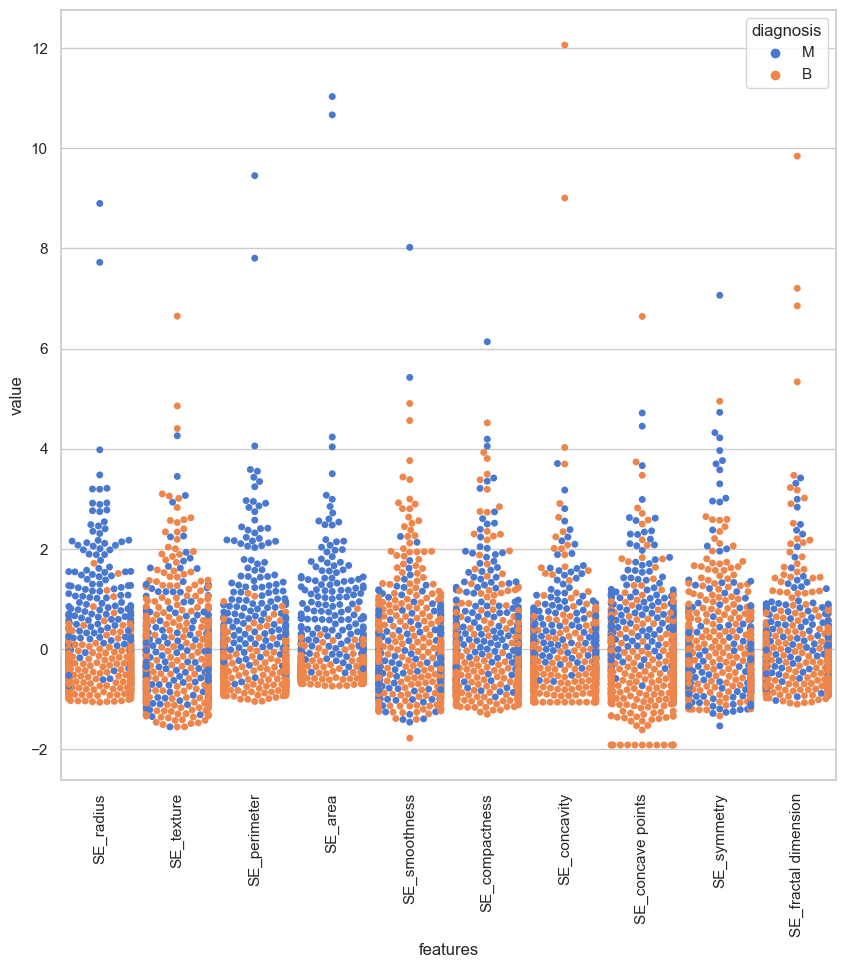

In [114]:
data=pd.concat([y,data_n.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
tic=time.time()
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

In [ ]:
data=pd.concat([y,data_n.iloc[:,20:31]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
tic=time.time()
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)